#PyTorch Computer Vision



```
["torchvision"] - base domain library for computer vision

"torchvision.datasets" - get datasets and data loading functions for computer vision
"torchvision.models" - get pretrained computer vision models that you can leverage for your own problems
"torchvision.transforms" - functions for manipulating your vision data (images) to be suitable for use with an ML model
"torch.utils.data.Dataset" - Base dataset class for PyTorch.
"torch.utils.data.DataLoader" - Creates a Python iterable over a dataset
```



In [ ]:
import torch
from torch import nn

import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


## 1. Getting a dataset

the dataset we'll be using FashionMNIST

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", #Where to download data to
    train=True, # do we want to training dataset
    download=True, # do we want to dowload
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data ?
    target_transform=None # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12738794.44it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212987.41it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1044711.70it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18973881.36it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image,label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#Check the shape of our image
print(f"Image shape : {image.shape} -> [color channel,height,width]")

Image shape : torch.Size([1, 28, 28]) -> [color channel,height,width]


## 1.2 Visualizing our data

Image shape : torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

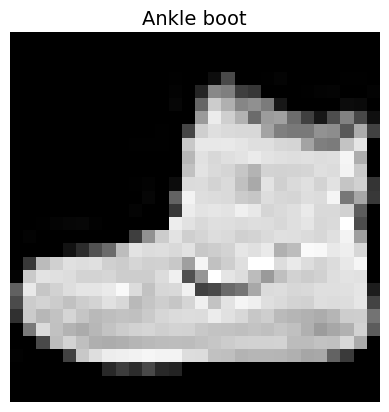

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label], fontsize=14)
plt.axis(False)

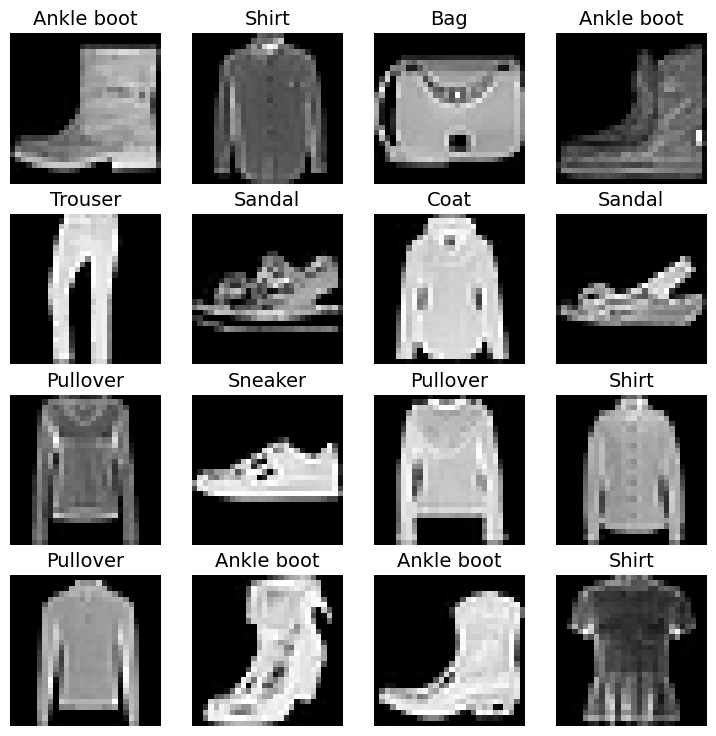

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label], fontsize=14)
  plt.axis(False)

Do you think these items of clothing could be modelled with pure linear lines?
Or do you think we'll need non-linearities

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch datasets

DataLoader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches(or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit, so we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradients per epoch



In [ ]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

#Let's check out what we've created
print(f"DataLoader: {train_dataloader,test_dataloader}\n")
print(f"Length of train dataloader: {len(train_dataloader)}\n")
print(f"Length of test dataloader: {len(test_dataloader)}")


DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7d53d7fa3790>, <torch.utils.data.dataloader.DataLoader object at 0x7d53d7fa3c70>)

Length of train dataloader: 1875

Length of test dataloader: 313


In [ ]:
#Check out what's inside the training loader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size : torch.Size([1, 28, 28])
Label : 6, label size : torch.Size([])


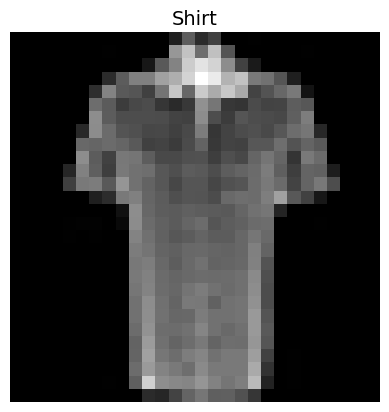

In [ ]:
#Show a sample
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)
# Ensure random_idx is within the bounds of the batch size
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label], fontsize=14)
plt.axis(False)
print(f"image size : {img.shape}")
print(f"Label : {label}, label size : {label.shape}")

## 3. Model 0 : Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/expreiments

In other words: start simply and add complexity when necessary

In [ ]:
#Create a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x) #Perform forward pass

#Print out what happened
print(f"Shape before flattening: {x.shape}\n")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])

Shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, #This is 28*28
    hidden_units=10, #how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss Function - since we're working with multi-class data, our loss function will be "nn.CrossEntropyLoss()"

* Optimizer - our optimizer "torch.optim.SGD()" (stochastic gradient descent)

* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [ ]:
#Import accuracy metric
from helper_functions import accuracy_fn

#Import loss function
loss_fn = nn.CrossEntropyLoss()

#Import optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### 3.2 Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
#Some code..
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


3.202900001042508e-05

## 3.3 Creating a training and testing

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. print out what's happening.
5. Time it for all

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0
  #Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)
    # 2. Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulatively add up the loss per epoch
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward
    loss.backward()
    # 5. Optimizer step
    optimizer.step()
    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. Forward pass
      test_pred = model_0(X_test)

      #2. Calculate loss(accumulatively)
      test_loss += loss_fn(test_pred,y_test)

      #3. Calculate accuracy
      # Pass the true labels (y_test) and predicted labels (test_pred.argmax(dim=1)) to the accuracy function
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    #Divide total train loss by length of train dataloader
    test_loss /= len(test_dataloader)
    #Divide total accuracy by length of test dataloader
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

#Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 48.021 seconds


##4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)
      # Accumulate the loss and acc
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

      #Scale loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name ":model.__class__.__name__,#only works when model was created with a class
          "model_loss ":loss.item(),
          "model_acc " : acc}

#Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FashionMNISTModelV0',
 'model_loss ': 0.47663894295692444,
 'model_acc ': 83.42651757188499}

In [ ]:
## 5. Setup device agnostic-code (for using a GPU if there is one)

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity

In [ ]:
import torch
import torch.nn as nn

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super(FashionMNISTModelV1, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x:torch.tensor):
        return self.layer_stack(x)


In [ ]:
#Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
device

'cpu'

### 6.1 Setup Loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), #tries to update our model's parameters to reduce the losss
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:

* training loop - train_step()

* testing loop - test_step()

In [ ]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device):
    """Performs a training with model trying to learn on data_loader."""
    train_loss,train_acc = 0,0

    model.train()

    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
      X,y = X.to(device), y.to(device)

      #Forward pass(outputs the raw logits from the model)
      y_pred = model(X)

      #Calculate the loss an accuracy per batch
      loss = loss_fn(y_pred,y)
      train_loss += loss
      train_acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))# Go from logits -> prediction labels
      #Optimizer zero grad
      optimizer.zero_grad()
      #Loss backward
      loss.backward()
      #Optimizer step
      optimizer.step()


    #Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

In [ ]:
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device):
  """Performs a testing with model trying to learn on data_loader."""
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for (X,y) in test_dataloader:
      X,y = X.to(device), y.to(device)
      #Forward pass(outputs the raw logits from the model)
      test_pred = model(X)

      #Calculate the loss an accuracy per batch
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                            y_pred=test_pred.argmax(dim=1))

    #Divide total train loss by length of train dataloader
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


In [ ]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
from tqdm import tqdm

train_time_start_on_gpu = timer()

#Set eopchs
epochs=3

#Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)
  test_step(model=model_1,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------

Train loss: 1.09199 | Train acc: 61.34%



 33%|███▎      | 1/3 [00:13<00:26, 13.15s/it]

Test loss: 0.95636, Test acc: 65.00%

Epoch: 1
-------

Train loss: 0.78101 | Train acc: 71.93%



 67%|██████▋   | 2/3 [00:25<00:12, 12.54s/it]

Test loss: 0.72227, Test acc: 73.91%

Epoch: 2
-------

Train loss: 0.67027 | Train acc: 75.94%



100%|██████████| 3/3 [00:38<00:00, 12.82s/it]

Test loss: 0.68500, Test acc: 75.02%

Train time on cpu: 38.477 seconds


In [ ]:
model_0_results

{'model_name ': 'FashionMNISTModelV0',
 'model_loss ': 0.47663894295692444,
 'model_acc ': 83.42651757188499}

**Note : ** Sometimes depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this ?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.

2. The hardware you're using has a better CPU in terms compute capability than the GPU

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #Make our data device agnostic
      X,y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)
      # Accumulate the loss and acc
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

      #Scale loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name ":model.__class__.__name__,#only works when model was created with a class
          "model_loss ":loss.item(),
          "model_acc " : acc}

#Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:01<00:00, 234.16it/s]


{'model_name ': 'FashionMNISTModelV0',
 'model_loss ': 0.47663894295692444,
 'model_acc ': 83.42651757188499}

In [ ]:
# Get model_1 results dictionary

model_1_results = eval_model(model = model_1,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:01<00:00, 221.79it/s]


{'model_name ': 'FashionMNISTModelV1',
 'model_loss ': 0.6850009560585022,
 'model_acc ': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN'S are also known ConvNets

Cnn's are known for theeir capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website : https://poloclub.github.io/cnn-explainer/


In [ ]:
import torch
import torch.nn as nn

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from the CNN explainer website
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,  # This should be the number of input channels, typically 1 for grayscale images
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,  # 7x7 is the reduced feature map size after the conv blocks and pooling
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through "nn.Conv2d()"

In [ ]:
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size = (32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=3,
                         stride=1,
                         padding=1)
# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape
#

torch.Size([1, 10, 64, 64])

### 7.2 Stepping through "nn.MaxPool2d()"

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
#Print out original shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqueezed shape: {test_image.unsqueeze(dim=0).shape}")

#Create a sample nn.Maxpool2d layer
max_pool_layer = nn.MaxPool2d( # Changed from Maxpool2d to MaxPool2d
    kernel_size=2,
)

#Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Test image through conv layer shape: {test_image_through_conv.shape}")

#Pass data through the max pool
pass_through_max_pool = max_pool_layer(test_image_through_conv)
print(f"Test image through max pool shape: {pass_through_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Test image through conv layer shape: torch.Size([1, 10, 64, 64])
Test image through max pool shape: torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
#Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

#Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")
random_tensor

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [ ]:
#Create dummy tensor
dummy_tensor = torch.randn(size=(1,1,3,3))


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


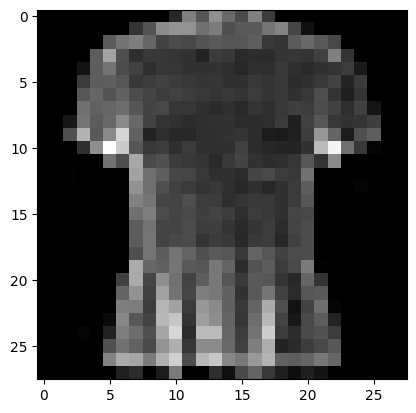

In [ ]:
plt.imshow(image.squeeze(dim=0),cmap="gray")

In [ ]:
#Pass image through model
model_2(image.unsqueeze(dim=0).to(device))

tensor([[-0.0358, -0.0015, -0.0339, -0.0628,  0.0236, -0.0250,  0.0122, -0.0170,
         -0.0035,  0.0806]], grad_fn=<AddmmBackward0>)

## 7.3 Setup a loss function and optimizer for model_2

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is
optimizer = torch.optim.SGD(params=model_2.parameters(), #tries to update our model's parameters to reduce the losss
                            lr=0.1)


##7.4 Training and testing model_2 using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs = 3
from tqdm import tqdm
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------

Train loss: 0.63397 | Train acc: 77.39%



 33%|███▎      | 1/3 [00:54<01:48, 54.42s/it]

Test loss: 0.39545, Test acc: 85.77%

Epoch: 1
-------

Train loss: 0.36957 | Train acc: 86.71%



 67%|██████▋   | 2/3 [01:49<00:54, 54.90s/it]

Test loss: 0.36046, Test acc: 87.22%

Epoch: 2
-------

Train loss: 0.33449 | Train acc: 87.80%



100%|██████████| 3/3 [02:46<00:00, 55.65s/it]

Test loss: 0.33884, Test acc: 87.92%

Train time on cpu: 166.963 seconds


In [ ]:
#Get model_2 results

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

100%|██████████| 313/313 [00:04<00:00, 76.49it/s]


{'model_name ': 'FashionMNISTModelV2',
 'model_loss ': 0.33884355425834656,
 'model_acc ': 87.91932907348243}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.338844,87.919329


In [ ]:
# Add training time to results comparison

compare_results["model_training_time"] = [total_train_time_model_0,
                                          total_train_time_model_1,
                                          total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,model_training_time
0,FashionMNISTModelV0,0.476639,83.426518,48.021032
1,FashionMNISTModelV1,0.685001,75.019968,38.477066
2,FashionMNISTModelV2,0.338844,87.919329,166.962980


In [ ]:
compare_results.value_counts()


,,,,count
model_name,model_loss,model_acc,model_training_time,
FashionMNISTModelV0,0.476639,83.426518,48.021032,1
FashionMNISTModelV1,0.685001,75.019968,38.477066,1
FashionMNISTModelV2,0.338844,87.919329,166.962980,1


In [ ]:
compare_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model_name           3 non-null      object 
 1   model_loss           3 non-null      float64
 2   model_acc            3 non-null      float64
 3   model_training_time  3 non-null      float64
dtypes: float64(3), object(1)
memory usage: 224.0+ bytes


##9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device,
                     ):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Make prediction
      sample = torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass
      pred_logit = model(sample)

      #Get prediction probabilities(logit--> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      #Get prediction_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  #Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

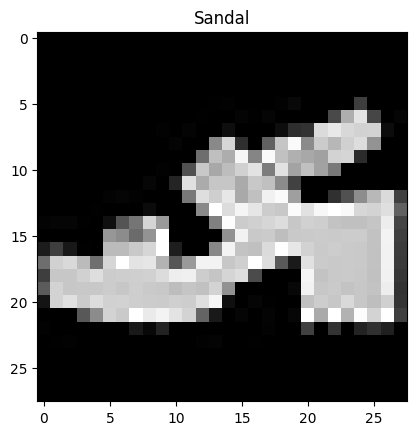

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make Predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

#View first two prediction probabilities
pred_probs[:2]

tensor([[8.8538e-08, 3.3563e-08, 3.2275e-07, 1.7823e-07, 5.8803e-08, 9.8906e-01,
         6.3303e-06, 9.2256e-05, 2.7754e-04, 1.0566e-02],
        [2.2464e-01, 2.6818e-01, 1.2278e-02, 4.4495e-01, 1.8662e-02, 1.0302e-03,
         2.6112e-02, 4.5780e-04, 2.7778e-03, 9.1777e-04]])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

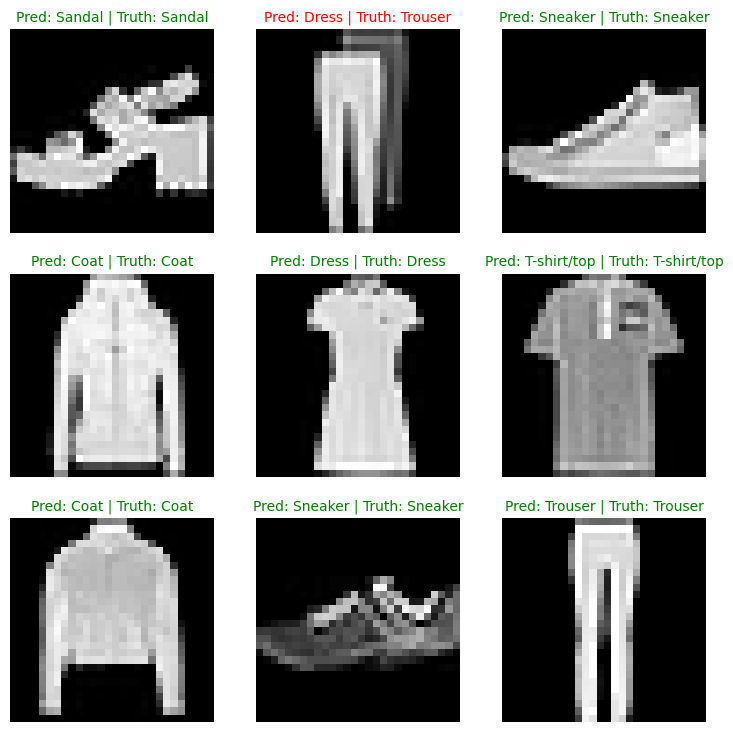

In [ ]:
# Plot predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3

for i,sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows,ncols,i+1)

  #Plot
  plt.imshow(sample.squeeze(),cmap="gray")

  #Find the prediction(in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  #Get the truth label(in text form)
  truth_label = class_names[test_labels[i]]

  #Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  #Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g") #green text if prediction same as truth
  else:
    plt.title(title_text,fontsize=10,c="r") #red text if prediction same as truth
  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually

# 1. Make predictions with our train model on the test dataset
2. Make a confusion matrix "torchmetrics.ConfusionMatrix"
3. Plot the confusion matrix using "mlxtend.plotting.plot_confusion_matrix()"


In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.23.1'

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions"):
    # Send the data and targets to target device
    X,y = X.to(device),y.to(device)
    #Do the forward pass
    y_logits = model_2(X)
    #Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    #Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4,
        1, 4, 5, 0, 4, 7, 9, 3]), tensor([7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 6, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 0,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 4,
        6, 4, 9, 7, 6, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 4, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
#See if required packages are installed and if not, install them..

try:
  import torchmetrics,mlxtend
  print(f"mlxtend version : {mlxtend.__version__}")
  assert int(mlxtend.__version__split(".")[1] >= 19,"mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version : {mlxtend.__version__}")

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
mlxtend.__version__

'0.23.1'

In [ ]:
assert int(mlxtend.__version__.split(".")[1]) >= 19,"mlxtend version should be 0.19.0 or higher"

In [ ]:
mlxtend.__version__

'0.23.1'

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [ ]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

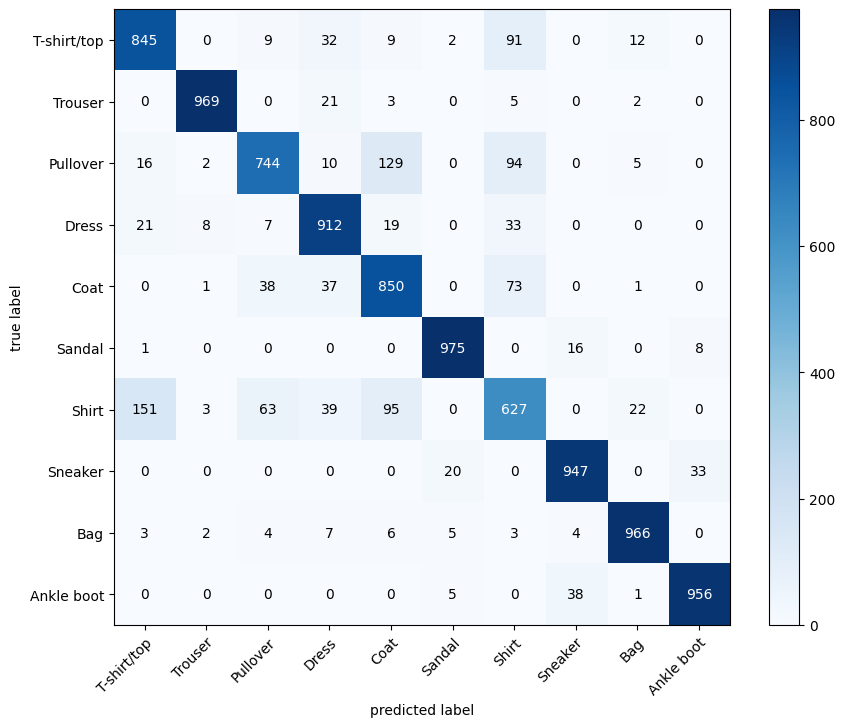

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes = len(class_names)) # Added task argument
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the conf matrix
fig,ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                               colorbar=True,
                               figsize=(10,8),
                               class_names=class_names)
plt.show()

## 11. Save and load best performing model

In [ ]:
from re import M
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = "fashion_mnist_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/fashion_mnist_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names)).to(device)

In [ ]:
#Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Send the model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name ': 'FashionMNISTModelV2',
 'model_loss ': 0.33884355425834656,
 'model_acc ': 87.91932907348243}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name ': 'FashionMNISTModelV2',
 'model_loss ': 0.33884355425834656,
 'model_acc ': 87.91932907348243}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss ']),
              torch.tensor(loaded_model_2_results['model_loss ']),
              atol=0.001)

tensor(True)